In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle
import os
%matplotlib inline

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!unzip "/content/gdrive/MyDrive/WordDetector-master.zip"

Archive:  /content/gdrive/MyDrive/WordDetector-master.zip
9c6fcb0800f17388261bce2fef06f378d24a6046
   creating: WordDetector-master/
 extracting: WordDetector-master/.gitignore  
  inflating: WordDetector-master/LICENSE.md  
  inflating: WordDetector-master/README.md  
   creating: WordDetector-master/data/
   creating: WordDetector-master/data/line/
 extracting: WordDetector-master/data/line/0.png  
 extracting: WordDetector-master/data/line/1.png  
 extracting: WordDetector-master/data/line/2.png  
  inflating: WordDetector-master/data/line/3.png  
  inflating: WordDetector-master/data/line/4.png  
  inflating: WordDetector-master/data/line/5.png  
   creating: WordDetector-master/data/page/
  inflating: WordDetector-master/data/page/r06-137.png  
   creating: WordDetector-master/doc/
  inflating: WordDetector-master/doc/example.png  
  inflating: WordDetector-master/doc/illustration.png  
  inflating: WordDetector-master/doc/kernel.png  
   creating: WordDetector-master/examples/
  

<class 'numpy.ndarray'>


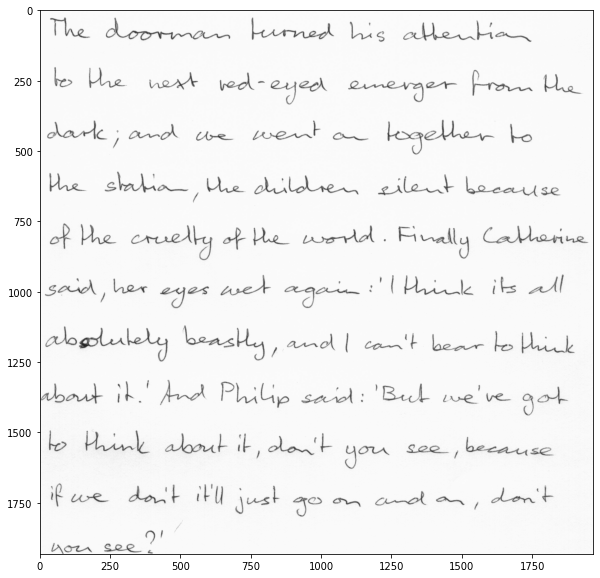

In [7]:
filename = '/content/WordDetector-master/data/page/r06-137.png'

# Load in Grayscale
img = cv2.imread(filename)

# The underlying representation is a numpy array!
print(type(img))

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

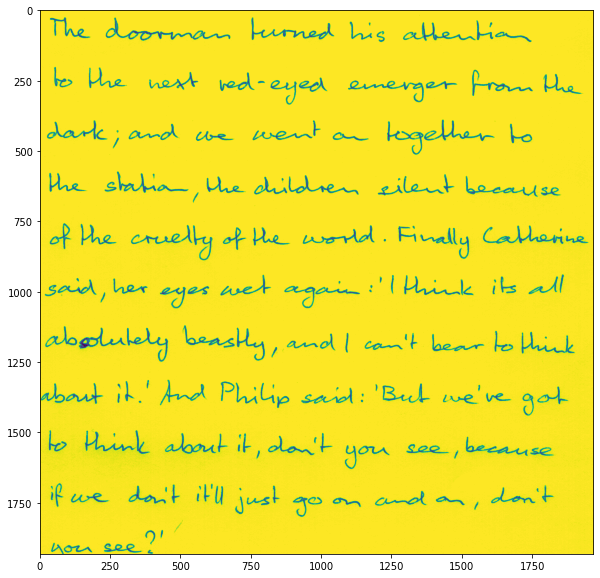

In [8]:
#import image
#image = cv2.imread('a01-000u.png')
#cv2.imshow('orig',image)
#cv2.waitKey(0)

#grayscale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10,10))
plt.imshow(gray)

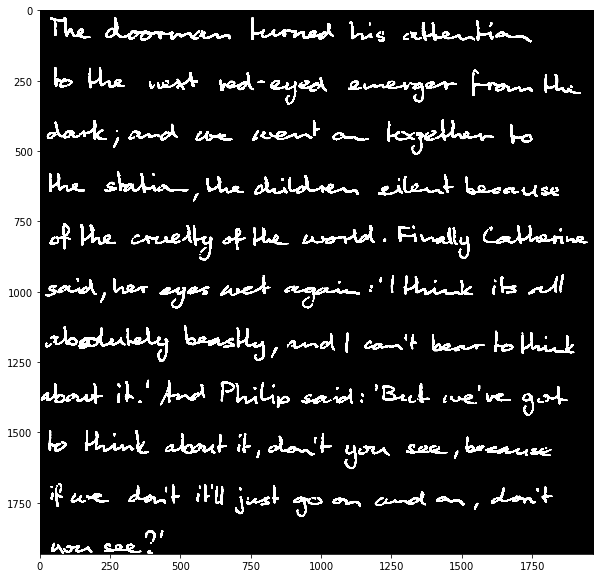

In [9]:
#binary
ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)
plt.figure(figsize=(10,10))
plt.imshow(thresh, cmap='gray', vmax=1, vmin=0)

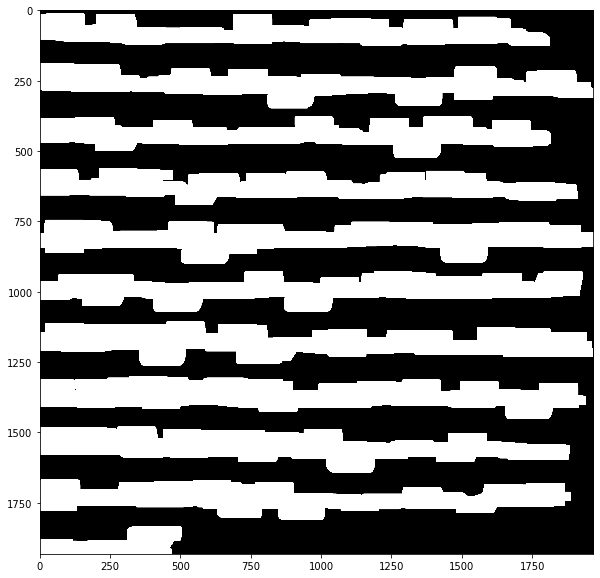

In [13]:
#dilation
kernel = np.ones((25,130), np.uint8)
img_dilation = cv2.dilate(thresh, kernel, iterations=1)
plt.figure(figsize=(10,10))
plt.imshow(img_dilation, cmap='gray', vmax=1, vmin=0)

(1932, 1968, 3)
[[15, 0, 1810, 110], [192, 0, 1968, 155], [379, 0, 1812, 145], [563, 0, 1907, 128], [747, 0, 1968, 153], [929, 0, 1925, 141], [1109, 0, 1961, 151], [1303, 0, 1938, 148], [1482, 0, 1880, 159], [1670, 0, 1883, 140], [1837, 0, 501, 95]]


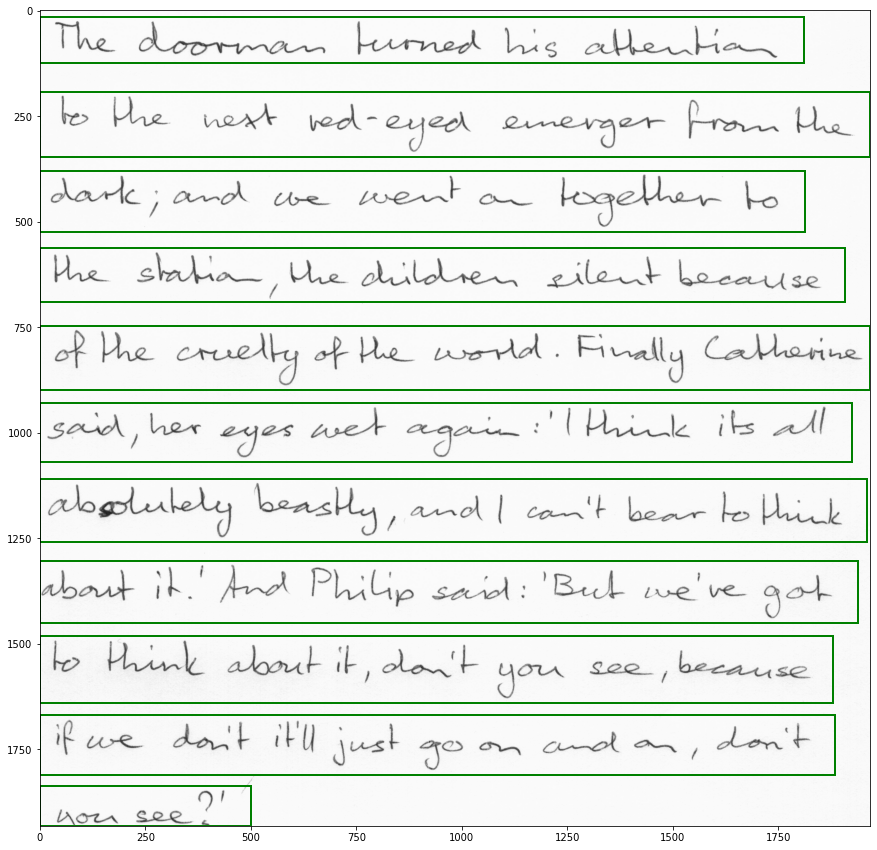

In [14]:
#find contours
ctrs,hier = cv2.findContours(img_dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

#sort contours from left to right and top to bottom
#sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
#it only sorts by y position of the bbox. to sort by x and y you'd use:
sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0] + cv2.boundingRect(ctr)[1] * img.shape[1] )

plt.figure(figsize=(15,15))
current_axis = plt.gca()

lst = []

for i, ctr in enumerate(sorted_ctrs):
    sub_list = []
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)
    sub_list.append(y)
    sub_list.append(x)
    sub_list.append(w)
    sub_list.append(h)
    
    #Getting ROI
    #roi = img[y:y+h, x:x+w]
    
    lst.append(sub_list)
    
    # show ROI
    #plt.imshow(roi)
    current_axis.add_patch(Rectangle((x, y), w, h, edgecolor = 'g', fill=False, linewidth=2)) 
    #crop_img = roi
    #cv2.rectangle(img,(x,y),( x + w, y + h ),(90,0,255),2)
    #cv2.waitKey(0)


print(img.shape)
print(lst)
plt.imshow(img)
plt.show()

In [ ]:
#import os
#os.chdir('/content/WordDetector-master')

In [15]:
!pip install '/content/WordDetector-master'

Processing ./WordDetector-master
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for word-detector: filename=word_detector-1.0.0-py3-none-any.whl size=4251 sha256=b8e230896a34799fa4cb35323f8954e529563a5253ffe2a1cd51188af2b9a931
  Stored in directory: /root/.cache/pip/wheels/34/ea/bd/904deab23a3bad9053acca9e744507ba4672adbbabccaf2cc8
Successfully built word-detector


In [16]:
!python '/content/WordDetector-master/tests/test_synthetic.py'

In [17]:
!python '/content/WordDetector-master/word_detector/__init__.py'

In [18]:
!python '/content/WordDetector-master/setup.py'

usage: setup.py [global_opts] cmd1 [cmd1_opts] [cmd2 [cmd2_opts] ...]
   or: setup.py --help [cmd1 cmd2 ...]
   or: setup.py --help-commands
   or: setup.py cmd --help

error: no commands supplied


In [20]:
from word_detector import prepare_img, detect, sort_line

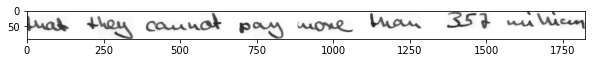

In [21]:
img1 = cv2.imread('/content/WordDetector-master/data/line/2.png')
plt.figure(figsize=(10,10))
plt.imshow(img1)

BBox(x=0, y=8, w=78, h=29)
BBox(x=104, y=11, w=89, h=39)
BBox(x=211, y=6, w=141, h=31)
BBox(x=375, y=19, w=86, h=31)
BBox(x=485, y=17, w=99, h=22)
BBox(x=611, y=6, w=97, h=26)
BBox(x=752, y=0, w=82, h=32)
BBox(x=860, y=8, w=141, h=24)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


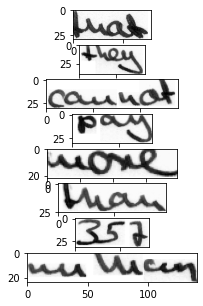

In [22]:
# (1) prepare image:
# (1a) convert to grayscale
# (1b) scale to specified height because algorithm is not scale-invariant

img = prepare_img(img1,50)
plt.figure(figsize=(5,5))
# (2) detect words in image
detections = detect(img,kernel_size=25,sigma=11,theta=7,min_area=100)

# (3) sort words in line
line = sort_line(detections)[0]

# (4) show word images
plt.subplot(len(line), 1, 1)
plt.imshow(img, cmap='gray')
for i, word in enumerate(line):
  print(word.bbox)
  plt.subplot(len(line), 1, i + 1)
  plt.imshow(word.img, cmap='gray')
plt.show()